# Importação dos Datasets para o Trabalho Final

**Equipe F**: Bernardo Bacha de Resende, Gustavo Augusto Faria dos Reis, Marília Macêdo de Melo

**Disciplina**: EEE933 - Planejamento e Análise de Experimentos (2025/2)

---

Este notebook importa os 5 datasets que serão utilizados como blocos no experimento:
1. **Iris** - Dataset de flores
2. **Wine** - Dataset de vinhos
3. **Breast Cancer Wisconsin** - Dataset de diagnóstico de câncer
4. **Heart Disease** - Dataset de doença cardíaca
5. **MNIST (Digits)** - Dataset de reconhecimento de dígitos

## Importação de Bibliotecas

In [23]:
import pandas as pd
import numpy as np
from sklearn import datasets
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações de visualização
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("✓ Bibliotecas importadas com sucesso!")

✓ Bibliotecas importadas com sucesso!


---
## Dataset 1: Iris

**Descrição**: Dataset clássico de classificação multiclasse (3 espécies de flores)
- **Amostras**: 150
- **Features**: 4 (medidas de pétalas e sépalas)
- **Classes**: 3 (Setosa, Versicolor, Virginica)
- **Dificuldade**: Muito baixa

In [24]:
# ========================================
# CARREGAMENTO DO DATASET IRIS
# ========================================

# Carregar dataset Iris
iris = datasets.load_iris()

# Criar DataFrame
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris['target'] = iris.target
df_iris['target_name'] = df_iris['target'].map({i: name for i, name in enumerate(iris.target_names)})

# Informações do dataset
print("=" * 60)
print("DATASET: IRIS")
print("=" * 60)
print(f"Shape: {df_iris.shape}")
print(f"Amostras: {df_iris.shape[0]}")
print(f"Features: {df_iris.shape[1] - 2}")
print(f"Classes: {df_iris['target'].nunique()} - {list(iris.target_names)}")
print("\nPrimeiras linhas:")
display(df_iris.head())
print("\nDistribuição das classes:")
print(df_iris['target_name'].value_counts())

# ========================================
# PREPARAÇÃO PARA SVM
# ========================================

print("\n" + "=" * 60)
print("PREPARAÇÃO PARA SVM")
print("=" * 60)

# Remover colunas auxiliares (manter apenas features + target)
df_iris_clean = df_iris.drop(columns=['target_name'])

# Separar features (X) e target (y)
X_iris = df_iris_clean.drop(columns=['target'])
y_iris = df_iris_clean['target']

# Validações
assert X_iris.select_dtypes(include=[np.number]).shape[1] == X_iris.shape[1], "❌ Erro: Existem colunas não numéricas em X_iris"
assert y_iris.isna().sum() == 0, "❌ Erro: Target contém valores nulos"
assert X_iris.isna().sum().sum() == 0, "❌ Erro: Features contêm valores nulos"

print("✓ Dataset Iris preparado para SVM")
print(f"  - X_iris shape: {X_iris.shape}")
print(f"  - y_iris shape: {y_iris.shape}")
print(f"  - Todas as features são numéricas: {X_iris.select_dtypes(include=[np.number]).shape[1] == X_iris.shape[1]}")
print(f"  - Sem valores nulos: {X_iris.isna().sum().sum() == 0}")

DATASET: IRIS
Shape: (150, 6)
Amostras: 150
Features: 4
Classes: 3 - [np.str_('setosa'), np.str_('versicolor'), np.str_('virginica')]

Primeiras linhas:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa



Distribuição das classes:
target_name
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

PREPARAÇÃO PARA SVM
✓ Dataset Iris preparado para SVM
  - X_iris shape: (150, 4)
  - y_iris shape: (150,)
  - Todas as features são numéricas: True
  - Sem valores nulos: True


---
## Dataset 2: Wine

**Descrição**: Dataset de classificação multiclasse (3 tipos de vinho)
- **Amostras**: 178
- **Features**: 13 (medidas químicas)
- **Classes**: 3 (tipos de vinho)
- **Dificuldade**: Baixa-Média

In [25]:
# ========================================
# CARREGAMENTO DO DATASET WINE
# ========================================

# Carregar dataset Wine
wine = datasets.load_wine()

# Criar DataFrame
df_wine = pd.DataFrame(wine.data, columns=wine.feature_names)
df_wine['target'] = wine.target
df_wine['target_name'] = df_wine['target'].map({i: f"Class_{i}" for i in range(len(wine.target_names))})

# Informações do dataset
print("=" * 60)
print("DATASET: WINE")
print("=" * 60)
print(f"Shape: {df_wine.shape}")
print(f"Amostras: {df_wine.shape[0]}")
print(f"Features: {df_wine.shape[1] - 2}")
print(f"Classes: {df_wine['target'].nunique()}")
print("\nPrimeiras linhas:")
display(df_wine.head())
print("\nDistribuição das classes:")
print(df_wine['target_name'].value_counts())

# ========================================
# PREPARAÇÃO PARA SVM
# ========================================

print("\n" + "=" * 60)
print("PREPARAÇÃO PARA SVM")
print("=" * 60)

# Remover colunas auxiliares (manter apenas features + target)
df_wine_clean = df_wine.drop(columns=['target_name'])

# Separar features (X) e target (y)
X_wine = df_wine_clean.drop(columns=['target'])
y_wine = df_wine_clean['target']

# Validações
assert X_wine.select_dtypes(include=[np.number]).shape[1] == X_wine.shape[1], "❌ Erro: Existem colunas não numéricas em X_wine"
assert y_wine.isna().sum() == 0, "❌ Erro: Target contém valores nulos"
assert X_wine.isna().sum().sum() == 0, "❌ Erro: Features contêm valores nulos"

print("✓ Dataset Wine preparado para SVM")
print(f"  - X_wine shape: {X_wine.shape}")
print(f"  - y_wine shape: {y_wine.shape}")
print(f"  - Todas as features são numéricas: {X_wine.select_dtypes(include=[np.number]).shape[1] == X_wine.shape[1]}")
print(f"  - Sem valores nulos: {X_wine.isna().sum().sum() == 0}")

DATASET: WINE
Shape: (178, 15)
Amostras: 178
Features: 13
Classes: 3

Primeiras linhas:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,target_name
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,Class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,Class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,Class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,Class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,Class_0



Distribuição das classes:
target_name
Class_1    71
Class_0    59
Class_2    48
Name: count, dtype: int64

PREPARAÇÃO PARA SVM
✓ Dataset Wine preparado para SVM
  - X_wine shape: (178, 13)
  - y_wine shape: (178,)
  - Todas as features são numéricas: True
  - Sem valores nulos: True


---
## Dataset 3: Breast Cancer Wisconsin (Diagnostic)

**Descrição**: Dataset de classificação binária (diagnóstico de câncer de mama)
- **Amostras**: 569
- **Features**: 30 (características de tumores)
- **Classes**: 2 (Maligno/Benigno)
- **Dificuldade**: Média

In [26]:
# ========================================
# CARREGAMENTO DO DATASET BREAST CANCER
# ========================================

# Carregar dataset Breast Cancer
breast_cancer = datasets.load_breast_cancer()

# Criar DataFrame
df_breast_cancer = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
df_breast_cancer['target'] = breast_cancer.target
df_breast_cancer['target_name'] = df_breast_cancer['target'].map({i: name for i, name in enumerate(breast_cancer.target_names)})

# Informações do dataset
print("=" * 60)
print("DATASET: BREAST CANCER WISCONSIN (DIAGNOSTIC)")
print("=" * 60)
print(f"Shape: {df_breast_cancer.shape}")
print(f"Amostras: {df_breast_cancer.shape[0]}")
print(f"Features: {df_breast_cancer.shape[1] - 2}")
print(f"Classes: {df_breast_cancer['target'].nunique()} - {list(breast_cancer.target_names)}")
print("\nPrimeiras linhas:")
display(df_breast_cancer.head())
print("\nDistribuição das classes:")
print(df_breast_cancer['target_name'].value_counts())

# ========================================
# PREPARAÇÃO PARA SVM
# ========================================

print("\n" + "=" * 60)
print("PREPARAÇÃO PARA SVM")
print("=" * 60)

# Remover colunas auxiliares (manter apenas features + target)
df_breast_cancer_clean = df_breast_cancer.drop(columns=['target_name'])

# Separar features (X) e target (y)
X_breast_cancer = df_breast_cancer_clean.drop(columns=['target'])
y_breast_cancer = df_breast_cancer_clean['target']

# Validações
assert X_breast_cancer.select_dtypes(include=[np.number]).shape[1] == X_breast_cancer.shape[1], "❌ Erro: Existem colunas não numéricas em X_breast_cancer"
assert y_breast_cancer.isna().sum() == 0, "❌ Erro: Target contém valores nulos"
assert X_breast_cancer.isna().sum().sum() == 0, "❌ Erro: Features contêm valores nulos"

print("✓ Dataset Breast Cancer preparado para SVM")
print(f"  - X_breast_cancer shape: {X_breast_cancer.shape}")
print(f"  - y_breast_cancer shape: {y_breast_cancer.shape}")
print(f"  - Todas as features são numéricas: {X_breast_cancer.select_dtypes(include=[np.number]).shape[1] == X_breast_cancer.shape[1]}")
print(f"  - Sem valores nulos: {X_breast_cancer.isna().sum().sum() == 0}")

DATASET: BREAST CANCER WISCONSIN (DIAGNOSTIC)
Shape: (569, 32)
Amostras: 569
Features: 30
Classes: 2 - [np.str_('malignant'), np.str_('benign')]

Primeiras linhas:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,target_name
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,malignant



Distribuição das classes:
target_name
benign       357
malignant    212
Name: count, dtype: int64

PREPARAÇÃO PARA SVM
✓ Dataset Breast Cancer preparado para SVM
  - X_breast_cancer shape: (569, 30)
  - y_breast_cancer shape: (569,)
  - Todas as features são numéricas: True
  - Sem valores nulos: True


---
## Dataset 4: Heart Disease (Cleveland)

**Descrição**: Dataset médico de classificação de doença cardíaca
- **Amostras**: 303 (297 após remoção de valores faltantes)
- **Features**: 13
- **Classes**: 2 (binária: presença/ausência de doença)
- **Dificuldade**: Média

**Nota**: Dataset carregado do arquivo .zip local e convertido para classificação binária

In [27]:
# ========================================
# CARREGAMENTO DO DATASET HEART DISEASE
# ========================================

# Carregar dataset Heart Disease do arquivo .zip local
zip_path = '../data/heart+disease.zip'

# Nomes das colunas (13 features + 1 target)
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 
                'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

# Ler o arquivo CSV de dentro do ZIP
with zipfile.ZipFile(zip_path, 'r') as z:
    with z.open('processed.cleveland.data') as f:
        # Ler o CSV, substituindo '?' por NaN
        df_heart_disease = pd.read_csv(f, header=None, names=column_names, na_values='?')

# Remover linhas com valores faltantes
df_heart_disease = df_heart_disease.dropna()

# Converter para classificação binária (0 = sem doença, 1 = com doença)
df_heart_disease['target_binary'] = (df_heart_disease['num'] > 0).astype(int)
df_heart_disease['target'] = df_heart_disease['target_binary']
df_heart_disease['target_name'] = df_heart_disease['target_binary'].map({0: 'No Disease', 1: 'Disease'})

# Informações do dataset
print("=" * 60)
print("DATASET: HEART DISEASE (CLEVELAND)")
print("=" * 60)
print(f"Shape: {df_heart_disease.shape}")
print(f"Amostras: {df_heart_disease.shape[0]}")
print(f"Features: {len(column_names) - 1}")
print(f"Classes (binária): {df_heart_disease['target_binary'].nunique()}")
print("\nPrimeiras linhas:")
display(df_heart_disease[['age', 'sex', 'cp', 'trestbps', 'chol', 'target', 'target_name']].head())
print("\nDistribuição das classes (binária):")
print(df_heart_disease['target_name'].value_counts())

# ========================================
# PREPARAÇÃO PARA SVM
# ========================================

print("\n" + "=" * 60)
print("PREPARAÇÃO PARA SVM")
print("=" * 60)

# Remover colunas auxiliares (manter apenas features + target)
df_heart_disease_clean = df_heart_disease.drop(columns=['num', 'target_binary', 'target_name'])

# A coluna 'thal' é categórica nominal (valores: 3, 6, 7)
# Precisamos aplicar One-Hot Encoding
print("Aplicando One-Hot Encoding na coluna 'thal'...")
df_heart_disease_encoded = pd.get_dummies(df_heart_disease_clean, columns=['thal'], prefix='thal', drop_first=False, dtype=int)

# Separar features (X) e target (y)
X_heart_disease = df_heart_disease_encoded.drop(columns=['target'])
y_heart_disease = df_heart_disease_encoded['target']

# Validações
assert X_heart_disease.select_dtypes(include=[np.number]).shape[1] == X_heart_disease.shape[1], "❌ Erro: Existem colunas não numéricas em X_heart_disease"
assert y_heart_disease.isna().sum() == 0, "❌ Erro: Target contém valores nulos"
assert X_heart_disease.isna().sum().sum() == 0, "❌ Erro: Features contêm valores nulos"

print("✓ Dataset Heart Disease preparado para SVM")
print(f"  - X_heart_disease shape: {X_heart_disease.shape}")
print(f"  - y_heart_disease shape: {y_heart_disease.shape}")
print(f"  - Colunas 'thal' após encoding: {[col for col in X_heart_disease.columns if 'thal' in col]}")
print(f"  - Todas as features são numéricas: {X_heart_disease.select_dtypes(include=[np.number]).shape[1] == X_heart_disease.shape[1]}")
print(f"  - Sem valores nulos: {X_heart_disease.isna().sum().sum() == 0}")

DATASET: HEART DISEASE (CLEVELAND)
Shape: (297, 17)
Amostras: 297
Features: 13
Classes (binária): 2

Primeiras linhas:


,age,sex,cp,trestbps,chol,target,target_name
0,63.0,1.0,1.0,145.0,233.0,0,No Disease
1,67.0,1.0,4.0,160.0,286.0,1,Disease
2,67.0,1.0,4.0,120.0,229.0,1,Disease
3,37.0,1.0,3.0,130.0,250.0,0,No Disease
4,41.0,0.0,2.0,130.0,204.0,0,No Disease



Distribuição das classes (binária):
target_name
No Disease    160
Disease       137
Name: count, dtype: int64

PREPARAÇÃO PARA SVM
Aplicando One-Hot Encoding na coluna 'thal'...
✓ Dataset Heart Disease preparado para SVM
  - X_heart_disease shape: (297, 15)
  - y_heart_disease shape: (297,)
  - Colunas 'thal' após encoding: ['thalach', 'thal_3.0', 'thal_6.0', 'thal_7.0']
  - Todas as features são numéricas: True
  - Sem valores nulos: True


---
## Dataset 5: MNIST Digits (Digit Recognizer)

**Descrição**: Dataset de reconhecimento de dígitos manuscritos
- **Amostras**: 1797 (versão 8x8)
- **Features**: 64 (8x8 pixels)
- **Classes**: 10 (dígitos 0-9)
- **Dificuldade**: Alta

**Nota**: Carregamos a versão 8x8 (mais rápida para o experimento)

DATASET: MNIST DIGITS (8x8 VERSION)
Shape: (1797, 66)
Amostras: 1797
Features: 64 (8x8 = 64 pixels)
Classes: 10 (dígitos 0-9)

Primeiras linhas:


,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_56,pixel_57,pixel_58,pixel_59,pixel_60,pixel_61,pixel_62,pixel_63,target,target_name
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4,4



Distribuição das classes:
target
0    178
1    182
2    177
3    183
4    181
5    182
6    181
7    179
8    174
9    180
Name: count, dtype: int64


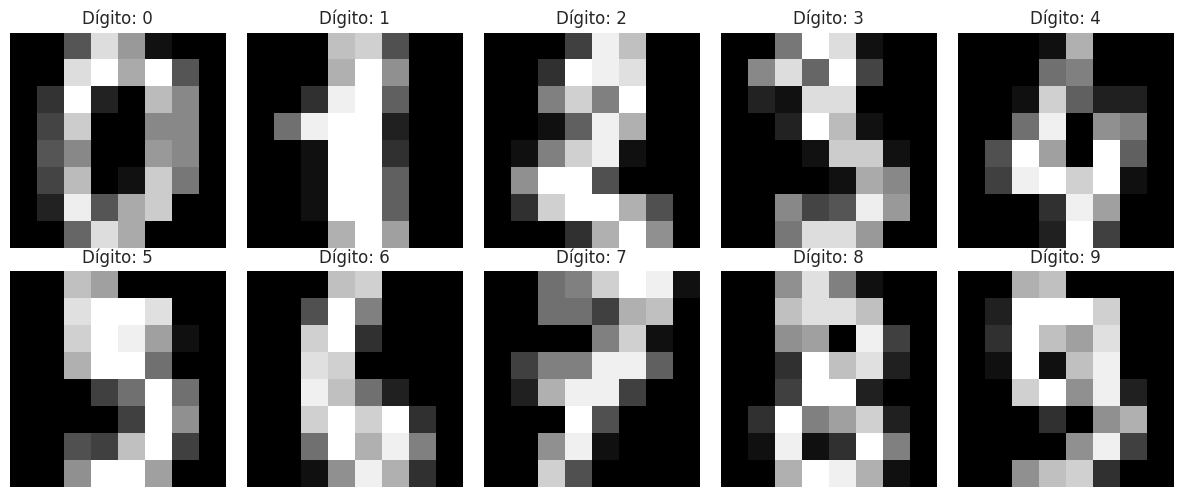


PREPARAÇÃO PARA SVM
✓ Dataset Digits (MNIST 8x8) preparado para SVM
  - X_digits shape: (1797, 64)
  - y_digits shape: (1797,)
  - Todas as features são numéricas: True
  - Sem valores nulos: True


In [28]:
# ========================================
# CARREGAMENTO DO DATASET DIGITS
# ========================================

# Carregar versão 8x8 (mais rápida para o experimento)
digits = datasets.load_digits()

# Criar DataFrame
df_digits = pd.DataFrame(digits.data)
df_digits.columns = [f'pixel_{i}' for i in range(digits.data.shape[1])]
df_digits['target'] = digits.target
df_digits['target_name'] = df_digits['target'].astype(str)

# Informações do dataset
print("=" * 60)
print("DATASET: MNIST DIGITS (8x8 VERSION)")
print("=" * 60)
print(f"Shape: {df_digits.shape}")
print(f"Amostras: {df_digits.shape[0]}")
print(f"Features: {df_digits.shape[1] - 2} (8x8 = 64 pixels)")
print(f"Classes: {df_digits['target'].nunique()} (dígitos 0-9)")
print("\nPrimeiras linhas:")
display(df_digits.head())
print("\nDistribuição das classes:")
print(df_digits['target'].value_counts().sort_index())

# Visualizar alguns exemplos
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(f'Dígito: {digits.target[i]}')
    ax.axis('off')
plt.tight_layout()
plt.show()

# ========================================
# PREPARAÇÃO PARA SVM
# ========================================

print("\n" + "=" * 60)
print("PREPARAÇÃO PARA SVM")
print("=" * 60)

# Remover colunas auxiliares (manter apenas features + target)
df_digits_clean = df_digits.drop(columns=['target_name'])

# Separar features (X) e target (y)
X_digits = df_digits_clean.drop(columns=['target'])
y_digits = df_digits_clean['target']

# Validações
assert X_digits.select_dtypes(include=[np.number]).shape[1] == X_digits.shape[1], "❌ Erro: Existem colunas não numéricas em X_digits"
assert y_digits.isna().sum() == 0, "❌ Erro: Target contém valores nulos"
assert X_digits.isna().sum().sum() == 0, "❌ Erro: Features contêm valores nulos"

print("✓ Dataset Digits (MNIST 8x8) preparado para SVM")
print(f"  - X_digits shape: {X_digits.shape}")
print(f"  - y_digits shape: {y_digits.shape}")
print(f"  - Todas as features são numéricas: {X_digits.select_dtypes(include=[np.number]).shape[1] == X_digits.shape[1]}")
print(f"  - Sem valores nulos: {X_digits.isna().sum().sum() == 0}")

---
## Resumo dos Datasets Carregados

Vamos criar uma tabela resumo com as características de cada dataset.

In [29]:
# Criar tabela resumo
resumo = pd.DataFrame({
    'Dataset': ['Iris', 'Wine', 'Breast Cancer', 'Heart Disease', 'MNIST Digits (8x8)'],
    'Amostras': [
        df_iris.shape[0],
        df_wine.shape[0],
        df_breast_cancer.shape[0],
        df_heart_disease.shape[0],
        df_digits.shape[0]
    ],
    'Features': [4, 13, 30, 13, 64],
    'Classes': [
        df_iris['target'].nunique(),
        df_wine['target'].nunique(),
        df_breast_cancer['target'].nunique(),
        df_heart_disease['target_binary'].nunique(),
        df_digits['target'].nunique()
    ],
    'Tipo': ['Multiclasse', 'Multiclasse', 'Binária', 'Binária', 'Multiclasse'],
    'Dificuldade': ['Muito Baixa', 'Baixa-Média', 'Média', 'Média', 'Alta']
})

print("\n" + "=" * 80)
print("RESUMO DOS DATASETS PARA O EXPERIMENTO RCBD")
print("=" * 80)
display(resumo)

print("\n" + "=" * 80)
print("Todos os datasets foram carregados com sucesso!")
print("=" * 80)


RESUMO DOS DATASETS PARA O EXPERIMENTO RCBD


,Dataset,Amostras,Features,Classes,Tipo,Dificuldade
0,Iris,150,4,3,Multiclasse,Muito Baixa
1,Wine,178,13,3,Multiclasse,Baixa-Média
2,Breast Cancer,569,30,2,Binária,Média
3,Heart Disease,297,13,2,Binária,Média
4,MNIST Digits (8x8),1797,64,10,Multiclasse,Alta



Todos os datasets foram carregados com sucesso!


---
## Variáveis Disponíveis para o Experimento

### DataFrames Completos:
- `df_iris` - Dataset Iris completo
- `df_wine` - Dataset Wine completo
- `df_breast_cancer` - Dataset Breast Cancer Wisconsin completo
- `df_heart_disease` - Dataset Heart Disease (Cleveland) completo
- `df_digits` - Dataset MNIST Digits (8x8) completo

### Variáveis Preparadas para SVM:
Cada dataset possui variáveis X (features) e y (target) prontas para uso:

1. **Iris**: `X_iris` (150, 4) e `y_iris` (150,)
2. **Wine**: `X_wine` (178, 13) e `y_wine` (178,)
3. **Breast Cancer**: `X_breast_cancer` (569, 30) e `y_breast_cancer` (569,)
4. **Heart Disease**: `X_heart_disease` (297, 15) e `y_heart_disease` (297,)
   - Nota: 15 features após one-hot encoding da coluna 'thal'
5. **Digits**: `X_digits` (1797, 64) e `y_digits` (1797,)

**Todas as features são numéricas e não há valores nulos.**